### LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pandas_profiling import ProfileReport
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster
from pyvi import ViPosTagger, ViTokenizer
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_22124\1494690340.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## IMPORT DATA

In [3]:
df1 = pd.read_csv("comments.csv", encoding="utf-8")

In [4]:
df1.head()

,product_id,comment_id,title,thank_count,customer_id,rating,comment
0,78895866,14155875,Cực kì hài lòng,0,6685717,5,NaN
1,78895866,13062056,Cực kì hài lòng,0,1547272,5,NaN
2,78895866,8693221,Cực kì hài lòng,0,21013331,5,"tôi rất hài lòng với sản phẩm này, nói chung ok"
3,78895866,12785832,Cực kì hài lòng,0,1743813,5,NaN
4,78895866,12714519,Cực kì hài lòng,0,13793638,5,NaN


In [5]:
profile = ProfileReport(df1)
profile.get_description()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

{'analysis': {'title': 'Pandas Profiling Report',
  'date_start': datetime.datetime(2023, 5, 15, 6, 55, 38, 317312),
  'date_end': datetime.datetime(2023, 5, 15, 6, 55, 57, 579073),
  'duration': datetime.timedelta(seconds=19, microseconds=261761)},
 'table': {'n': 447651,
  'n_var': 7,
  'memory_size': 25068584,
  'record_size': 56.00028593703577,
  'n_cells_missing': 184213,
  'n_vars_with_missing': 2,
  'n_vars_all_missing': 0,
  'p_cells_missing': 0.05878718657423497,
  'types': {'Numeric': 4, 'Categorical': 3},
  'n_duplicates': 87384,
  'p_duplicates': 0.1952056401080306},
 'variables': {'product_id': {'n_distinct': 9184,
   'p_distinct': 0.020515982316581444,
   'is_unique': False,
   'n_unique': 7,
   'p_unique': 1.5637181643735856e-05,
   'type': 'Numeric',
   'hashable': True,
   'value_counts_without_nan': 107363748    600
   116446788    400
   75403873     400
   95089986     400
   85186200     400
               ... 
   213845608      1
   49995900       1
   201697050  

In [6]:
df1['rating'].value_counts()

5    343052
4     57142
1     24031
3     15345
2      8081
Name: rating, dtype: int64

In [7]:
df1.shape

(447651, 7)

### DROP ROWS WHICH HAVE NAN VALUES AND DUMPLICATE

Check NaN

In [8]:
missing_val_num = df1.isnull().sum()
missing_percent = (missing_val_num / df1.shape[0]) * 100
missing_info = {'missing_values': missing_val_num,
                'missing_percent': round(missing_percent,3)}
missing_df = pd.DataFrame(missing_info)
missing_df

,missing_values,missing_percent
product_id,0,0.000
comment_id,0,0.000
title,12,0.003
thank_count,0,0.000
customer_id,0,0.000
rating,0,0.000
comment,184201,41.148


In [9]:
# Drop all rows with NaN values
df1.dropna(inplace=True)
print(df1.shape)
print(df1.isnull().sum())

(263438, 7)
product_id     0
comment_id     0
title          0
thank_count    0
customer_id    0
rating         0
comment        0
dtype: int64


Check dumplicate

In [10]:
df3 = df1[~df1['comment'].isnull()]
df3.duplicated().sum()

67321

In [11]:
df3.drop_duplicates(inplace=True)

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196117 entries, 2 to 447639
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   product_id   196117 non-null  int64 
 1   comment_id   196117 non-null  int64 
 2   title        196117 non-null  object
 3   thank_count  196117 non-null  int64 
 4   customer_id  196117 non-null  int64 
 5   rating       196117 non-null  int64 
 6   comment      196117 non-null  object
dtypes: int64(5), object(2)
memory usage: 12.0+ MB


In [13]:
for index, row in df3.sample(50).iterrows():
    print(row['comment'])

Giao hàng nhanh
Đóng gói tốt
Giao nhanh, chép dữ liệu nhanh, có điều mua màu đỏ phong thủy cái tặng bọc xanh bỉn hờn qué ạ :))))))))
.
.
Rất thích
Với những bạn thường xuyên sử dụng laptop để đánh máy thì nên sắm một em này nhé, phải nói là dễ gõ hơn bàn phím trên máy và cực kỳ tiện lợi, khi sử dụng thì chỉ cần cắm dây vào và dùng thôi. Sử dụng bàn phím trên laptop nhiều đến lúc hư hỏng thì phải thay, sửa chữa rất phiền phức và đặc biệt tốn khá nhiều chi phí nhưng với một em bàn phím riêng thì chúng ra chỉ cần sửa chữa hoặc thay mới với giá cực kỳ rẻ, em mua em này với giá chỉ 149k thôi đó mọi người ơi, quá rẻ cho một thiết bị công nghệ.
Dây cứ mềm mềm. Dùng ngoài trời có lẽ k ổn
giao nhanh mà bao bì của giấy nhìn kém chất lượng quá. hy vọng giấy ko tệ
đã dùng hết 1 bộ, rất ok. Nên dùng kèm xả vs dầu gội
H
Sp dùng ổn
Giao hàng siêu nhanh
Đóng gói kĩ lưỡng
Có điều vừa mua xong thì nhận ra the cocoon sale lớn :< hơi buồn 1 tẹo
Rất tốt nhưng hạn chế dán tường nứt
Sẹo rỗ có cải thiện nên s

In [14]:
df3.shape

(196117, 7)

### KEEP RATING AND COMMENT DATA

In [15]:
df4 = df3[['rating','comment']]

In [16]:
conditions = [
    (df4['rating'] < 3),
    (df4['rating'] == 3),
    (df4['rating'] > 3)
]

values = ['negative', 'neutral', 'positive']

df4['class'] = np.select(conditions, values)
df4 = df4[['comment','class']]

In [17]:
df4.reset_index(drop=True, inplace=True)

In [18]:
df4.head()

,comment,class
0,"tôi rất hài lòng với sản phẩm này, nói chung ok",positive
1,ọ,positive
2,"Sản phẩm có chất lượng đúng như mô tả, đóng gó...",positive
3,"Sản phẩm có chất lượng đúng như mô tả, đóng gó...",positive
4,"Sản phẩm có chất lượng đúng như mô tả, đóng gó...",positive


In [19]:
# Check NaN again
df4.isnull().sum()

comment    0
class      0
dtype: int64

In [20]:
df4['class'].value_counts()

positive    162683
negative     22674
neutral      10760
Name: class, dtype: int64

### CLEAN TEXT

In [21]:
from processing import *

In [22]:
# Create a cluster
cluster = LocalCluster()
client = Client(cluster)
dask.config.set(scheduler='multiprocessing')

In [23]:
from processing import processing_text

Convert dask df to pd df

In [24]:
# Create a dask dataframe from the pandas dataframe
ddf = dd.from_pandas(df4, npartitions=16)
ddf = ddf.map_partitions(processing_text)
# Convert the dask dataframe to pandas dataframe
with ProgressBar():
    df = ddf.compute(num_workers=7)
del ddf

[########################################] | 100% Completed | 432.29 s


In [34]:
for index, row in df.sample(100).iterrows():
    print(row['processed_text'])

màu đăng hình giorgione tưởng nhầm học vẽ chất_lượng cũng_ổn không_thích kiểu đầu dê thịt chó hình đàng tiếng
găng bị_mất
mùi cực_kì mê gội lưu hương_lâu tóc khô tóc mượt mềm ưng nút
màu tốt
đóng bị_bể móp không_bị chảy nứt
chuột êm ổn tầm giá
máy thuận tiên
chuột phím bấm êm lướt click nhẹ không_tiếng động giá hài_lòng vọng chuột xài bền
đóng gói kỷ hàng mẫu_mã xài tốt ủng_hộ chúc đơn hàng_đầu mắn


sản_phẩm rất_mạnh tốc_độ mạng online cảm_giác ổn_định không_khác dây
màu đẹp chất_liệu cầm cảm_giác xịn

mẫu_mã sản_phẩm đẹp đóng_gói kỹ thất_vọng đóng_gói màng chống xốc hàng điện_tử vận_chuyển đóng_gói hàng kỹ khách_hàng yên_tâm

mùi thơm nhẹ đóng_gói
sản_phẩm như_quảng_cáo cài_đặt chất_lượng đầu tạm ổn
hàng
hàng chóng đóng_gói chất_lượng giấy

hàng đóng_gói nguyên rất_hài
chuột hơi_nặng bật đèn cảm_giác tiếng click chuột giá
sản_phẩm tốt đóng_gói đẹp
thiết_kế bìa đẹp hàng
dở
hộp hàng bị_rách bị_móp hành mẫu dán băng nắp hộp rất_thất vọng
ốp lưng dẻo mềm
tốt
mực nét khô không_bị nhòe viế

In [35]:
df.reset_index(drop=True, inplace=True)

In [36]:
df_final = df[['processed_text','class']]

In [37]:
df_final.head()

,processed_text,class
0,rất_hài sản_phẩm,positive
1,,positive
2,sản_phẩm chất_lượng như_mô tả đóng_gói hàng rấ...,positive
3,sản_phẩm chất_lượng như_mô tả đóng_gói rất_đán...,positive
4,sản_phẩm chất_lượng như_mô tả đóng_gói rất_đán...,positive


In [38]:
df_final['processed_text'].loc[1]

''

In [41]:
df_final.isnull().sum()

processed_text    0
class             0
dtype: int64

In [39]:
df_final.to_csv('comment_final.csv')

### VISUALIZE

Negative

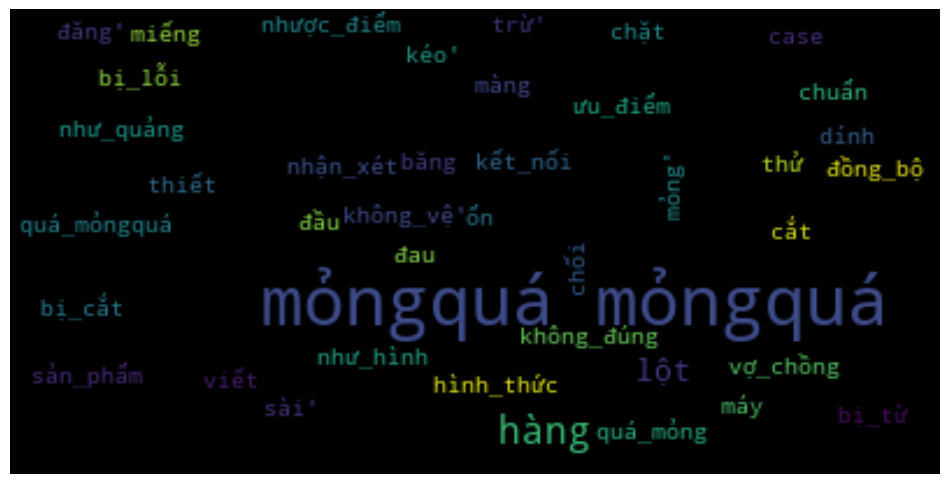

In [42]:
df_final_notlike = df_final[df_final['class'] == 'negative' ]
wc_notlike = WordCloud(
    background_color='black',
    max_words=500
)
wc_notlike.generate(str(df_final_notlike['processed_text'].values))
plt.figure(figsize=(12, 12))
plt.imshow(wc_notlike, interpolation='bilinear')
plt.axis('off')
plt.show()

Neutral

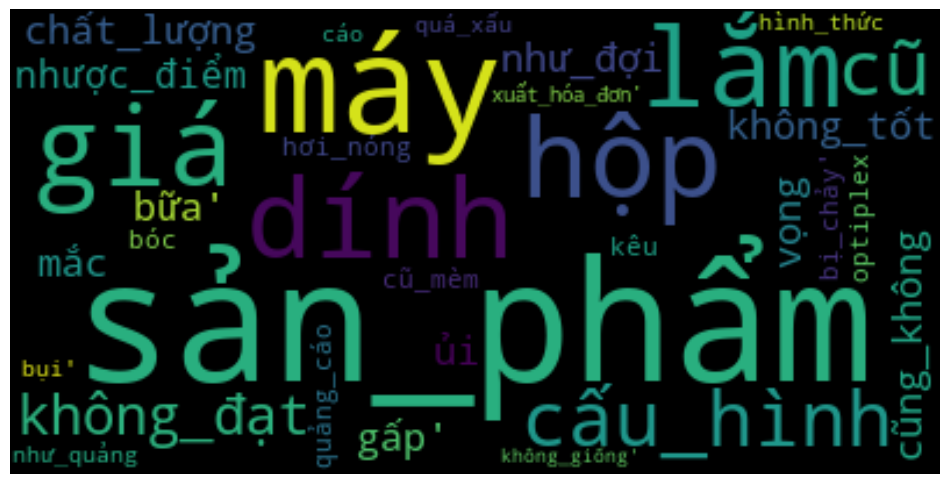

In [43]:
df_final_neutral = df_final[df_final['class'] == 'neutral' ]
wc_neutral = WordCloud(
    background_color='black',
    max_words=500
)
wc_neutral.generate(str(df_final_neutral['processed_text'].values))
plt.figure(figsize=(12, 12))
plt.imshow(wc_neutral, interpolation='bilinear')
plt.axis('off')
plt.show()

Positive

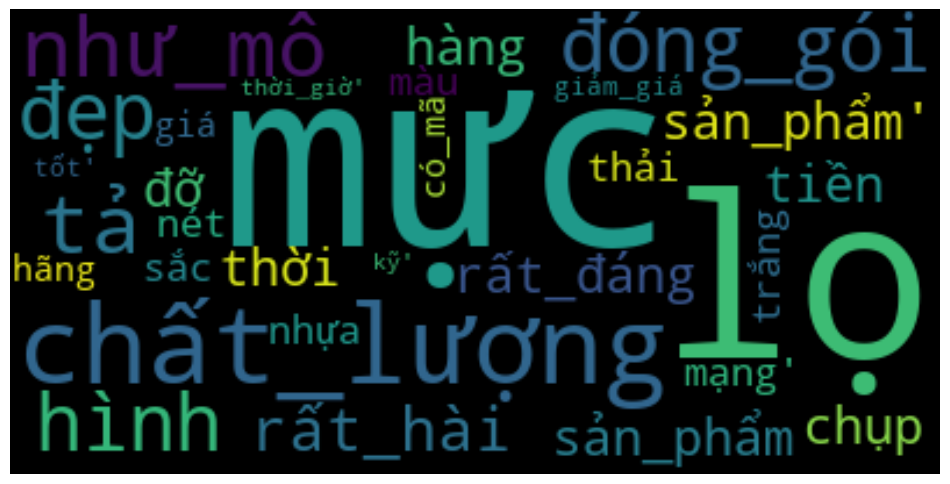

In [44]:
df_final_like = df_final[df_final['class'] == 'positive' ]
wc_like = WordCloud(
    background_color='black',
    max_words=500
)
wc_like.generate(str(df_final_like['processed_text'].values))
plt.figure(figsize=(12, 12))
plt.imshow(wc_like, interpolation='bilinear')
plt.axis('off')
plt.show()